### `---------------Mandatory Information to fill------------`

### Group ID:
### Group Members Name with Student ID:
1. Student 1
2. Student 2
3. Student 3
4. Student 4


`-------------------Write your remarks (if any) that you want should get consider at the time of evaluation---------------`

Remarks: ##Add here

# Background

In the world of online streaming, user satisfaction and engagement are critical metrics for the success of a movie recommendation system. A well-designed recommendation algorithm can significantly enhance user experience by suggesting movies that align with their preferences, leading to higher platform retention and usage. Recommendation systems face the challenge of balancing exploration (discovering new movies) with exploitation (recommending known favourites) to maximize user satisfaction over time.


# Scenario

Imagine a leading online movie streaming platform, TrendMovie Inc., that aims to become the go-to destination for personalized movie recommendations. The platform features a vast collection of movies catering to diverse audiences. TrendMovie Inc. wants to optimize its recommendation strategy to deliver maximum user satisfaction while maintaining a high level of engagement. Each movie recommendation is treated as an interaction with the user, and their feedback is used to refine the recommendation strategy dynamically.


# Objective

Your objective is to design and implement a recommendation system using Multi-Armed Bandit (MAB) algorithms to maximize cumulative user satisfaction. The system should dynamically allocate recommendations by learning user preferences in real-time, striking the right balance between exploration and exploitation.


# Dataset

The dataset contains user ratings for a variety of movies. Key columns in the dataset include:
*   **User ID:** A unique identifier for each user.
*   **Movie ID:** A unique identifier for each.
*   **Rating:** A score provided by the user for a movie (on a scale of 1 to 5).
*   **Timestamp:** The time when the rating was given (optional for this assignment).

***Link for accessing dataset:***
https://drive.google.com/file/d/1gfobhqlVCw8Oo52JCiYpEBGhG5k7cWBr/view?usp=drive_link


# Environment Details

**Arms:** Each movie represents an "arm" in the MAB framework. The probability of a movie being liked by a user is initially unknown and will be estimated based on user feedback during the interactions.
For example:

Arm 1: Movie A

Arm 2: Movie B

Arm 3: Movie C

... and so on, for all movies in the dataset.

**Reward Function:**
The reward function is defined based on user ratings:

***Reward = 1:*** The user rates the movie high star (e.g., 4 or 5 stars).

***Reward = 0:*** The user rates the movie low star (e.g., 1, 2, or 3 stars).


**Assumptions:**

Run simulations for 1000 iterations for each policy


# Requirements and Deliverables:
Implement the Multi-Arm Bandit Problem for the given above scenario for all the below mentioned policy methods.

### Initialize constants

In [ ]:
# Constants


# Initialize value function and policy

# Load Dataset (0.5M)

Basic Statistics:
Total Users: 610
Total Movies: 9724
Total Ratings: 100836
Average Rating: 3.50
Median Rating: 3.50
Mode Rating: 4.00
Rating Standard Deviation: 1.04

Movie-Specific Statistics (Sample):
   movieId  num_ratings  avg_rating
0        1          215    3.920930
1        2          110    3.431818
2        3           52    3.259615
3        4            7    2.357143
4        5           49    3.071429

User-Specific Statistics (Sample):
   userId  num_ratings  avg_rating
0       1          232    4.366379
1       2           29    3.948276
2       3           39    2.435897
3       4          216    3.555556
4       5           44    3.636364

Reward Summary:
       Reward Type  Count
0   Low Star (1-3)  52256
1  High Star (4-5)  48580


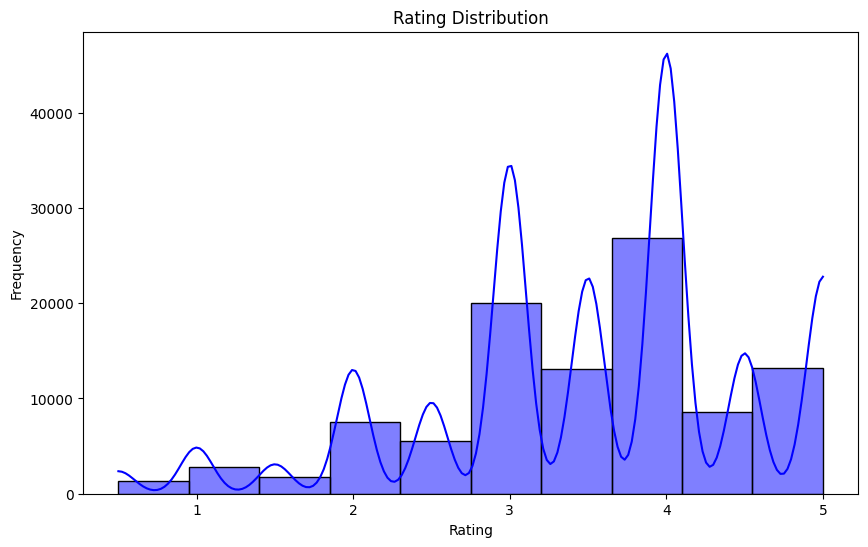

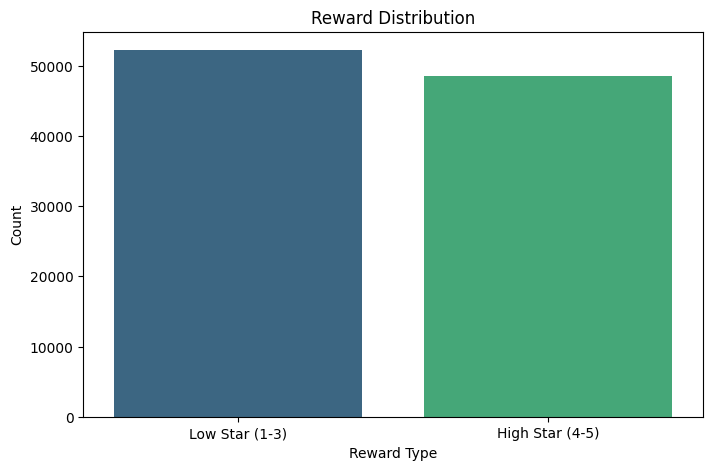

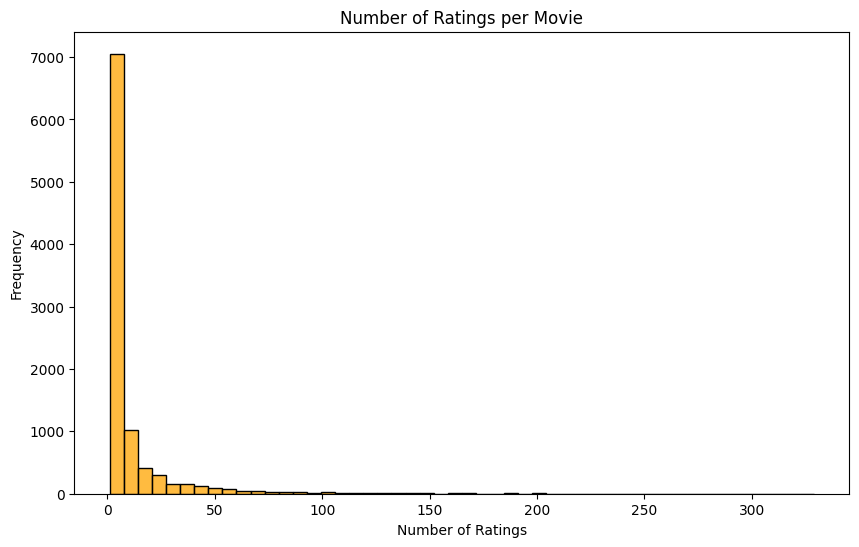

Null rating or timestamp 0 0
   userId  num_ratings  avg_rating
0       1          232    4.366379
1       2           29    3.948276
2       3           39    2.435897
3       4          216    3.555556
4       5           44    3.636364
   movieId  num_ratings  avg_rating
0        1          215    3.920930
1        2          110    3.431818
2        3           52    3.259615
3        4            7    2.357143
4        5           49    3.071429


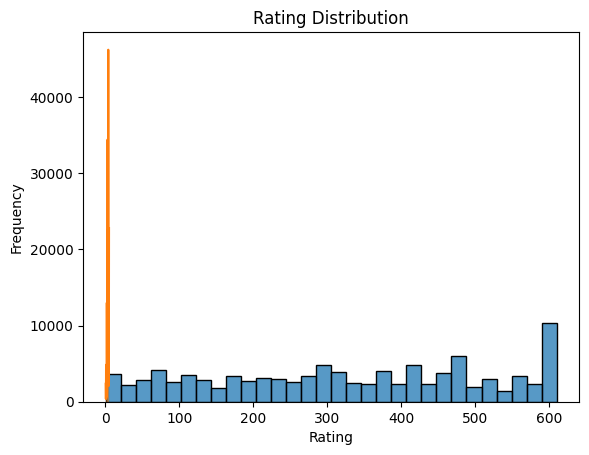

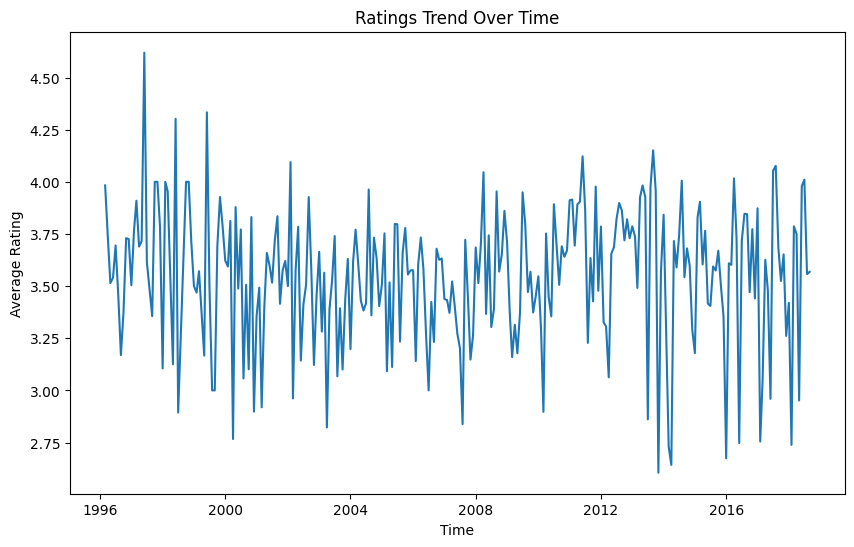

/var/folders/b9/q31nghyd24b5920dkkt46_49d6wc6n/T/ipykernel_21836/1048801824.py:143: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=movieDF, x='movie_bin', y='rating', palette=palette)


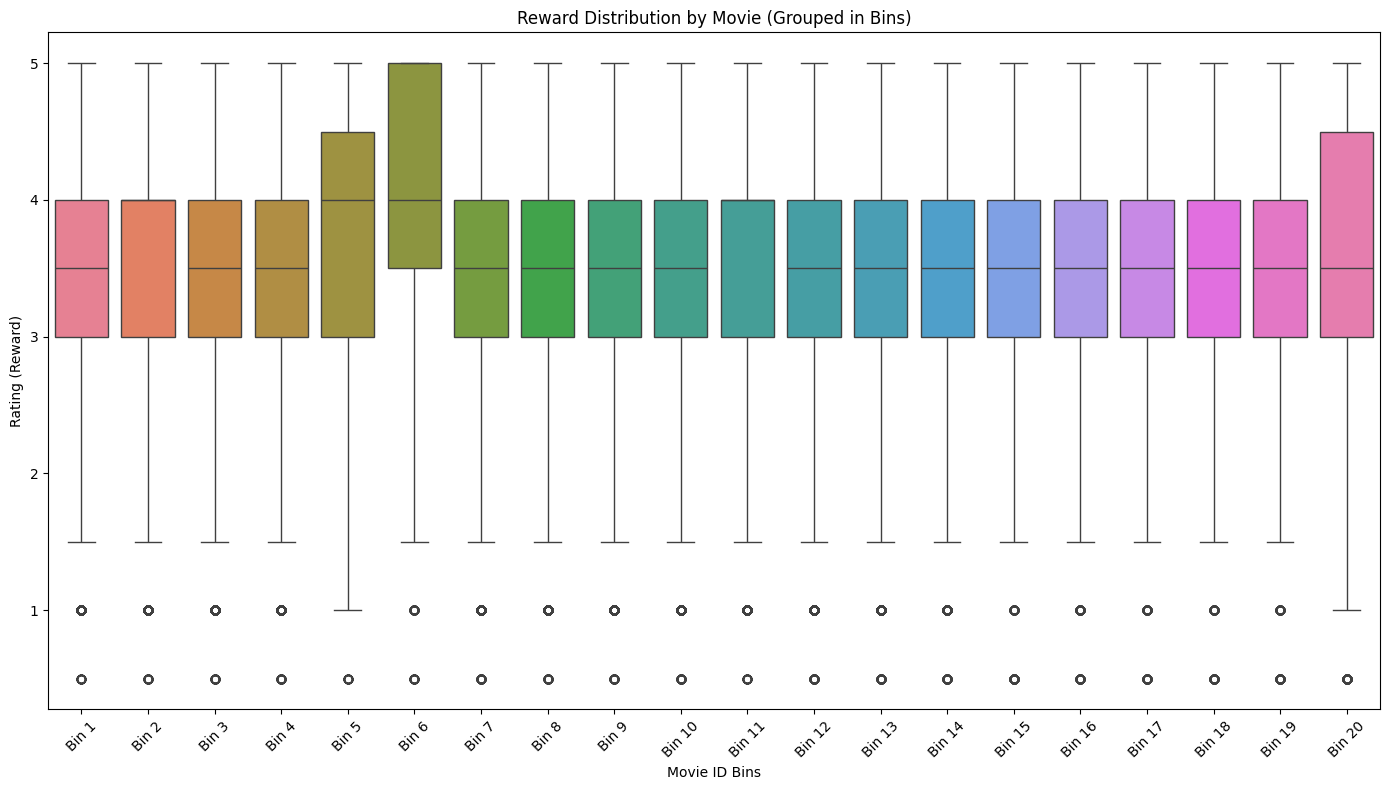

Users Engaged with Top Movies: 193
Users Engaged with Low Movies: 421


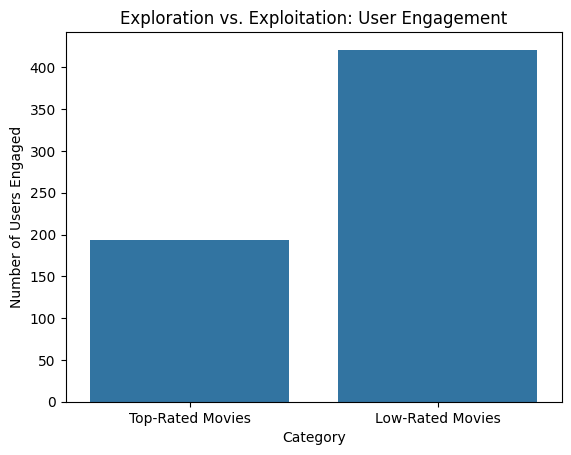

Number of Cold Start Movies: 6074


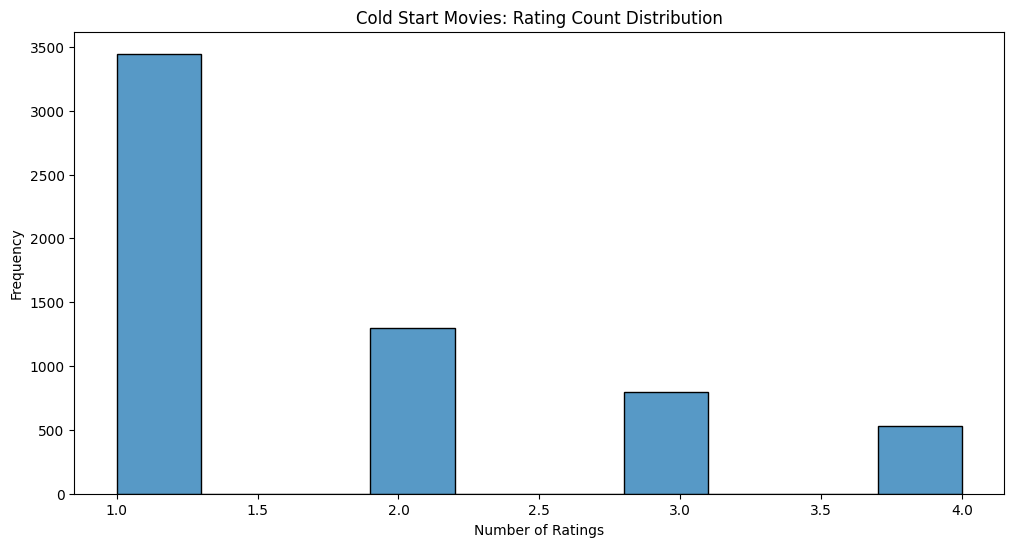

In [1]:
# Code for Dataset loading and print dataset statistics
#-----write your code below this line---------
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
cwd = os.getcwd()
load_file_path = cwd + '/TrendMovie.csv'

movieDF = pd.read_csv(load_file_path)
#  Details on the weather data set
# 1. Basic Dataset Statistics
def dataset_statistics(df):
    print("Basic Statistics:")
    print(f"Total Users: {df['userId'].nunique()}")
    print(f"Total Movies: {df['movieId'].nunique()}")
    print(f"Total Ratings: {len(df)}")
    print(f"Average Rating: {df['rating'].mean():.2f}")
    print(f"Median Rating: {df['rating'].median():.2f}")
    print(f"Mode Rating: {df['rating'].mode()[0]:.2f}")
    print(f"Rating Standard Deviation: {df['rating'].std():.2f}")
    
dataset_statistics(movieDF)

# 2. Movie-Specific Statistics
movie_stats = movieDF.groupby('movieId')['rating'].agg(['count', 'mean']).reset_index()
movie_stats.rename(columns={'count': 'num_ratings', 'mean': 'avg_rating'}, inplace=True)

print("\nMovie-Specific Statistics (Sample):")
print(movie_stats.head())

# 3. User-Specific Statistics
user_stats = movieDF.groupby('userId')['rating'].agg(['count', 'mean']).reset_index()
user_stats.rename(columns={'count': 'num_ratings', 'mean': 'avg_rating'}, inplace=True)

print("\nUser-Specific Statistics (Sample):")
print(user_stats.head())

# 4. Reward Function
movieDF['reward'] = movieDF['rating'].apply(lambda x: 1 if x >= 4 else 0)

# 5. Reward Summary
reward_summary = movieDF['reward'].value_counts().reset_index()
reward_summary.columns = ['Reward Type', 'Count']
reward_summary['Reward Type'] = reward_summary['Reward Type'].replace({1: 'High Star (4-5)', 0: 'Low Star (1-3)'})
print("\nReward Summary:")
print(reward_summary)

# 6. Visualizations
# Rating distribution
plt.figure(figsize=(10, 6))
sns.histplot(movieDF['rating'], bins=10, kde=True, color='blue')
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

# Reward distribution
plt.figure(figsize=(8, 5))
sns.barplot(data=reward_summary, x='Reward Type', y='Count', palette='viridis', legend=False, hue='Reward Type')
plt.title("Reward Distribution")
plt.xlabel("Reward Type")
plt.ylabel("Count")
plt.show()

# Movie ratings count distribution
plt.figure(figsize=(10, 6))
sns.histplot(movie_stats['num_ratings'], bins=50, kde=False, color='orange')
plt.title("Number of Ratings per Movie")
plt.xlabel("Number of Ratings")
plt.ylabel("Frequency")
plt.show()

# Check for Missing Values: Identify and handle missing values in columns like rating or timestamp.
rating_null = movieDF['rating'].isnull().sum()
timestamp_null = movieDF['timestamp'].isnull().sum()

print("Null rating or timestamp", rating_null, timestamp_null)

# converting time stamp into human readable format...
movieDF['date'] = pd.to_datetime(movieDF['timestamp'], unit='s')

# User Actvity Distribution
sns.histplot(data=movieDF, x='userId', bins=30, kde=False)

# Number of ratings per user
ratings_per_user = movieDF.groupby('userId')['rating'].count()

# Average rating per user
avg_rating_per_user = movieDF.groupby('userId')['rating'].mean()

# Convert to DataFrame for visualization or analysis
user_activity = pd.DataFrame({
    'num_ratings': ratings_per_user,
    'avg_rating': avg_rating_per_user
}).reset_index()

print(user_activity.head())

# Number of ratings per movie
ratings_per_movie = movieDF.groupby('movieId')['rating'].count()

# Average rating per movie
avg_rating_per_movie = movieDF.groupby('movieId')['rating'].mean()

# Convert to DataFrame for visualization or analysis
movie_popularity = pd.DataFrame({
    'num_ratings': ratings_per_movie,
    'avg_rating': avg_rating_per_movie
}).reset_index()

print(movie_popularity.head())

# Plot overall rating distribution
sns.histplot(movieDF['rating'], bins=10, kde=True)
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

# Aggregate ratings over time
ratings_over_time = movieDF.groupby(movieDF['date'].dt.to_period('M'))['rating'].mean()

# Reset index for plotting
ratings_over_time = ratings_over_time.reset_index()
ratings_over_time['date'] = ratings_over_time['date'].dt.to_timestamp()

# Line plot of average ratings over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=ratings_over_time, x='date', y='rating')
plt.title("Ratings Trend Over Time")
plt.xlabel("Time")
plt.ylabel("Average Rating")
plt.show()

# Reward distribution (ratings as rewards) by movie ..Reward Distribution
# Sort movie IDs and create bins for better interpretability
movieDF['movie_bin'] = pd.qcut(movieDF['movieId'], q=20, labels=[f"Bin {i}" for i in range(1, 21)])

# Colorful boxplot by bins
plt.figure(figsize=(14, 8))
palette = sns.color_palette("husl", n_colors=20)  # Use a colorful palette
sns.boxplot(data=movieDF, x='movie_bin', y='rating', palette=palette)

plt.title("Reward Distribution by Movie (Grouped in Bins)")
plt.xlabel("Movie ID Bins")
plt.ylabel("Rating (Reward)")
plt.xticks(rotation=45)  # Slight rotation for better readability
plt.tight_layout()
plt.show()


# Define top-rated and low-rated movies based on average rating ..Exploration vs. Exploitation
movie_stats = movieDF.groupby('movieId')['rating'].agg(['mean', 'count']).reset_index()
movie_stats.rename(columns={'mean': 'avg_rating', 'count': 'num_ratings'}, inplace=True)

# Thresholds for top-rated and low-rated movies
top_movies = movie_stats[movie_stats['avg_rating'] >= 4.5]
low_movies = movie_stats[movie_stats['avg_rating'] <= 2.5]

# Count of interactions for top and low-rated movies
top_movie_engagement = movieDF[movieDF['movieId'].isin(top_movies['movieId'])]['userId'].nunique()
low_movie_engagement = movieDF[movieDF['movieId'].isin(low_movies['movieId'])]['userId'].nunique()

print(f"Users Engaged with Top Movies: {top_movie_engagement}")
print(f"Users Engaged with Low Movies: {low_movie_engagement}")

# Plot engagement comparison
engagement_data = pd.DataFrame({
    'Category': ['Top-Rated Movies', 'Low-Rated Movies'],
    'User Engagement': [top_movie_engagement, low_movie_engagement]
})

sns.barplot(data=engagement_data, x='Category', y='User Engagement')
plt.title("Exploration vs. Exploitation: User Engagement")
plt.xlabel("Category")
plt.ylabel("Number of Users Engaged")
plt.show()

# Identify movies with fewer than a threshold of ratings (e.g., 5)  Cold Start Movies
cold_start_threshold = 5
cold_start_movies = movie_stats[movie_stats['num_ratings'] < cold_start_threshold]

print(f"Number of Cold Start Movies: {len(cold_start_movies)}")

# Plot cold start movies
plt.figure(figsize=(12, 6))
sns.histplot(cold_start_movies['num_ratings'], bins=10, kde=False)
plt.title("Cold Start Movies: Rating Count Distribution")
plt.xlabel("Number of Ratings")
plt.ylabel("Frequency")
plt.show()



# Design a Movie Environment (0.5M)

In [19]:
# Code for Dataset loading and print dataset statistics along with reward function
#-----write your code below this line---------

# Define the Movie Environment class
class MovieEnvironment:
    def __init__(self, dataset):
        self.dataset = dataset
        self.movies = dataset['movieId'].unique()
        self.rewards = {movie: [] for movie in self.movies}

    def get_statistics(self):
        # Dataset statistics
        print("Dataset Statistics:")
        print(f"Number of Users: {self.dataset['userId'].nunique()}")
        print(f"Number of Movies: {self.dataset['movieId'].nunique()}")
        print(f"Number of Ratings: {len(self.dataset)}")
        print(f"Average Rating: {self.dataset['rating'].mean():.2f}")
        print(f"Median Rating: {self.dataset['rating'].median():.2f}")
        print(f"Mode Rating: {self.dataset['rating'].mode()[0]:.2f}")
        print(f"Rating Standard Deviation: {self.dataset['rating'].std():.2f}")

    def reward_function(self, movie_id, rating):
        """
        Reward function:
        - High star (4 or 5): reward = 1
        - Low star (1, 2, 3): reward = 0
        """
        return 1 if rating >= 4 else 0

    def simulate_interaction(self, user_id):
        """
        Simulates interaction with a user:
        - Picks a random movie and returns reward based on user rating.
        """
        user_data = self.dataset[self.dataset['userId'] == user_id]
        if user_data.empty:
            print(f"No data available for User {user_id}")
            return None

        # Randomly select a movie rated by the user
        sample = user_data.sample()
        movie_id = sample['movieId'].iloc[0]
        rating = sample['rating'].iloc[0]
        reward = self.reward_function(movie_id, rating)

        # Store the reward
        self.rewards[movie_id].append(reward)
        return movie_id, rating, reward

    def get_rewards_summary(self):
        """
        Plots a summary of rewards for each movie.
        """
        for movie, rewards in self.rewards.items():
            print(f"Movie {movie}: Total Rewards = {sum(rewards)}, Trials = {len(rewards)}")

    

# Initialize the environment
movie_env = MovieEnvironment(movieDF)

# Print dataset statistics
movie_env.get_statistics()

# Simulate interactions for a specific user
for _ in range(10):  # Simulate 10 interactions and print statistics and reward function
    result = movie_env.simulate_interaction(user_id=1)
    if result:
        movie_id, rating, reward = result
        print(f"User rated Movie {movie_id} with {rating} stars -> Reward: {reward}")

movie_env.get_rewards_summary()

Dataset Statistics:
Number of Users: 610
Number of Movies: 9724
Number of Ratings: 100836
Average Rating: 3.50
Median Rating: 3.50
Mode Rating: 4.00
Rating Standard Deviation: 1.04
User rated Movie 1275 with 5.0 stars -> Reward: 1
User rated Movie 1625 with 5.0 stars -> Reward: 1
User rated Movie 1136 with 5.0 stars -> Reward: 1
User rated Movie 661 with 5.0 stars -> Reward: 1
User rated Movie 1024 with 5.0 stars -> Reward: 1
User rated Movie 1920 with 4.0 stars -> Reward: 1
User rated Movie 3671 with 5.0 stars -> Reward: 1
User rated Movie 333 with 5.0 stars -> Reward: 1
User rated Movie 592 with 4.0 stars -> Reward: 1
User rated Movie 2046 with 4.0 stars -> Reward: 1
Movie 1: Total Rewards = 0, Trials = 0
Movie 3: Total Rewards = 0, Trials = 0
Movie 6: Total Rewards = 0, Trials = 0
Movie 47: Total Rewards = 0, Trials = 0
Movie 50: Total Rewards = 0, Trials = 0
Movie 70: Total Rewards = 0, Trials = 0
Movie 101: Total Rewards = 0, Trials = 0
Movie 110: Total Rewards = 0, Trials = 0
Mov

# Using Random Policy (0.5M)
Implement a random policy for movie recommendations and print each iteration. (Mandatory)

In [ ]:
#  run the environment with an agent that is guided by a random policy
#-----write your code below this line---------

# Using Greedy Policy (1M)
Implement a greedy policy that always recommends the movie with the highest estimated reward and print each iteration. (Mandatory)

In [ ]:
#  run the environment with an agent that is guided by a greedy policy
#-----write your code below this line---------

# Using Epsilon-Greedy Policy (1.5M)
Implement the epsilon-greedy policy, where with probability ε you explore (recommend a random movie) and with probability (1-ε) you exploit (recommend the best-known movie). Try with ε =0.1, 0.2, 0.5 and print each iteration. What value of ε yields the best performance? (Mandatory)

In [ ]:
#  run the environment with an agent that is guided by a epsilon-greedy policy
#-----write your code below this line---------

# Using UCB (1M)
Implement the UCB algorithm for movie recommendations and print each iteration. (Mandatory)

In [ ]:
#  run the environment with an agent that is guided by a UCB
#-----write your code below this line---------

# Plot the cumulative rewards for all policies on a single graph to compare their performance. (0.5M)

In [ ]:
#-----write your code below this line---------


# Conclusion (0.5M)

Determine which policy performs the best based on cumulative reward. Provide a concise conclusion (250 words) summarizing the decision-making process and the trade-offs between exploration and exploitation.

`----write below this line------`